In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data

In [23]:
# Mengambil citra brick dari dataset skimage
image = data.brick()

In [24]:
# Melakukan equalisasi histogram menggunakan fungsi equalizeHist dari library cv2
image_equalized = cv2.equalizeHist(image)

In [25]:
# Membuat objek CLAHE dengan parameter tertentu
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

# Mengaplikasikan CLAHE pada citra asli
image_clahe = clahe.apply(image)

In [26]:

# Membuat array kosong untuk menyimpan output akhir
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')
# Melakukan kontras Min-Max
# Menghitung nilai minimum dan maksimum citra asli
min = np.min(image)
max = np.max(image)

# Melakukan perulangan untuk setiap piksel citra
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Melakukan perhitungan kontras Min-Max pada setiap piksel
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)

In [27]:
# Membuat salinan citra asli dalam tipe data float
copyCamera = image.copy().astype(float)

# Mendapatkan dimensi citra salinan
m1,n1 = copyCamera.shape
# Membuat array kosong untuk menyimpan output
output1 = np.empty([m1, n1])
# Melakukan perulangan untuk setiap piksel citra salinan
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        # Melakukan operasi perkalian konstanta pada setiap piksel
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9

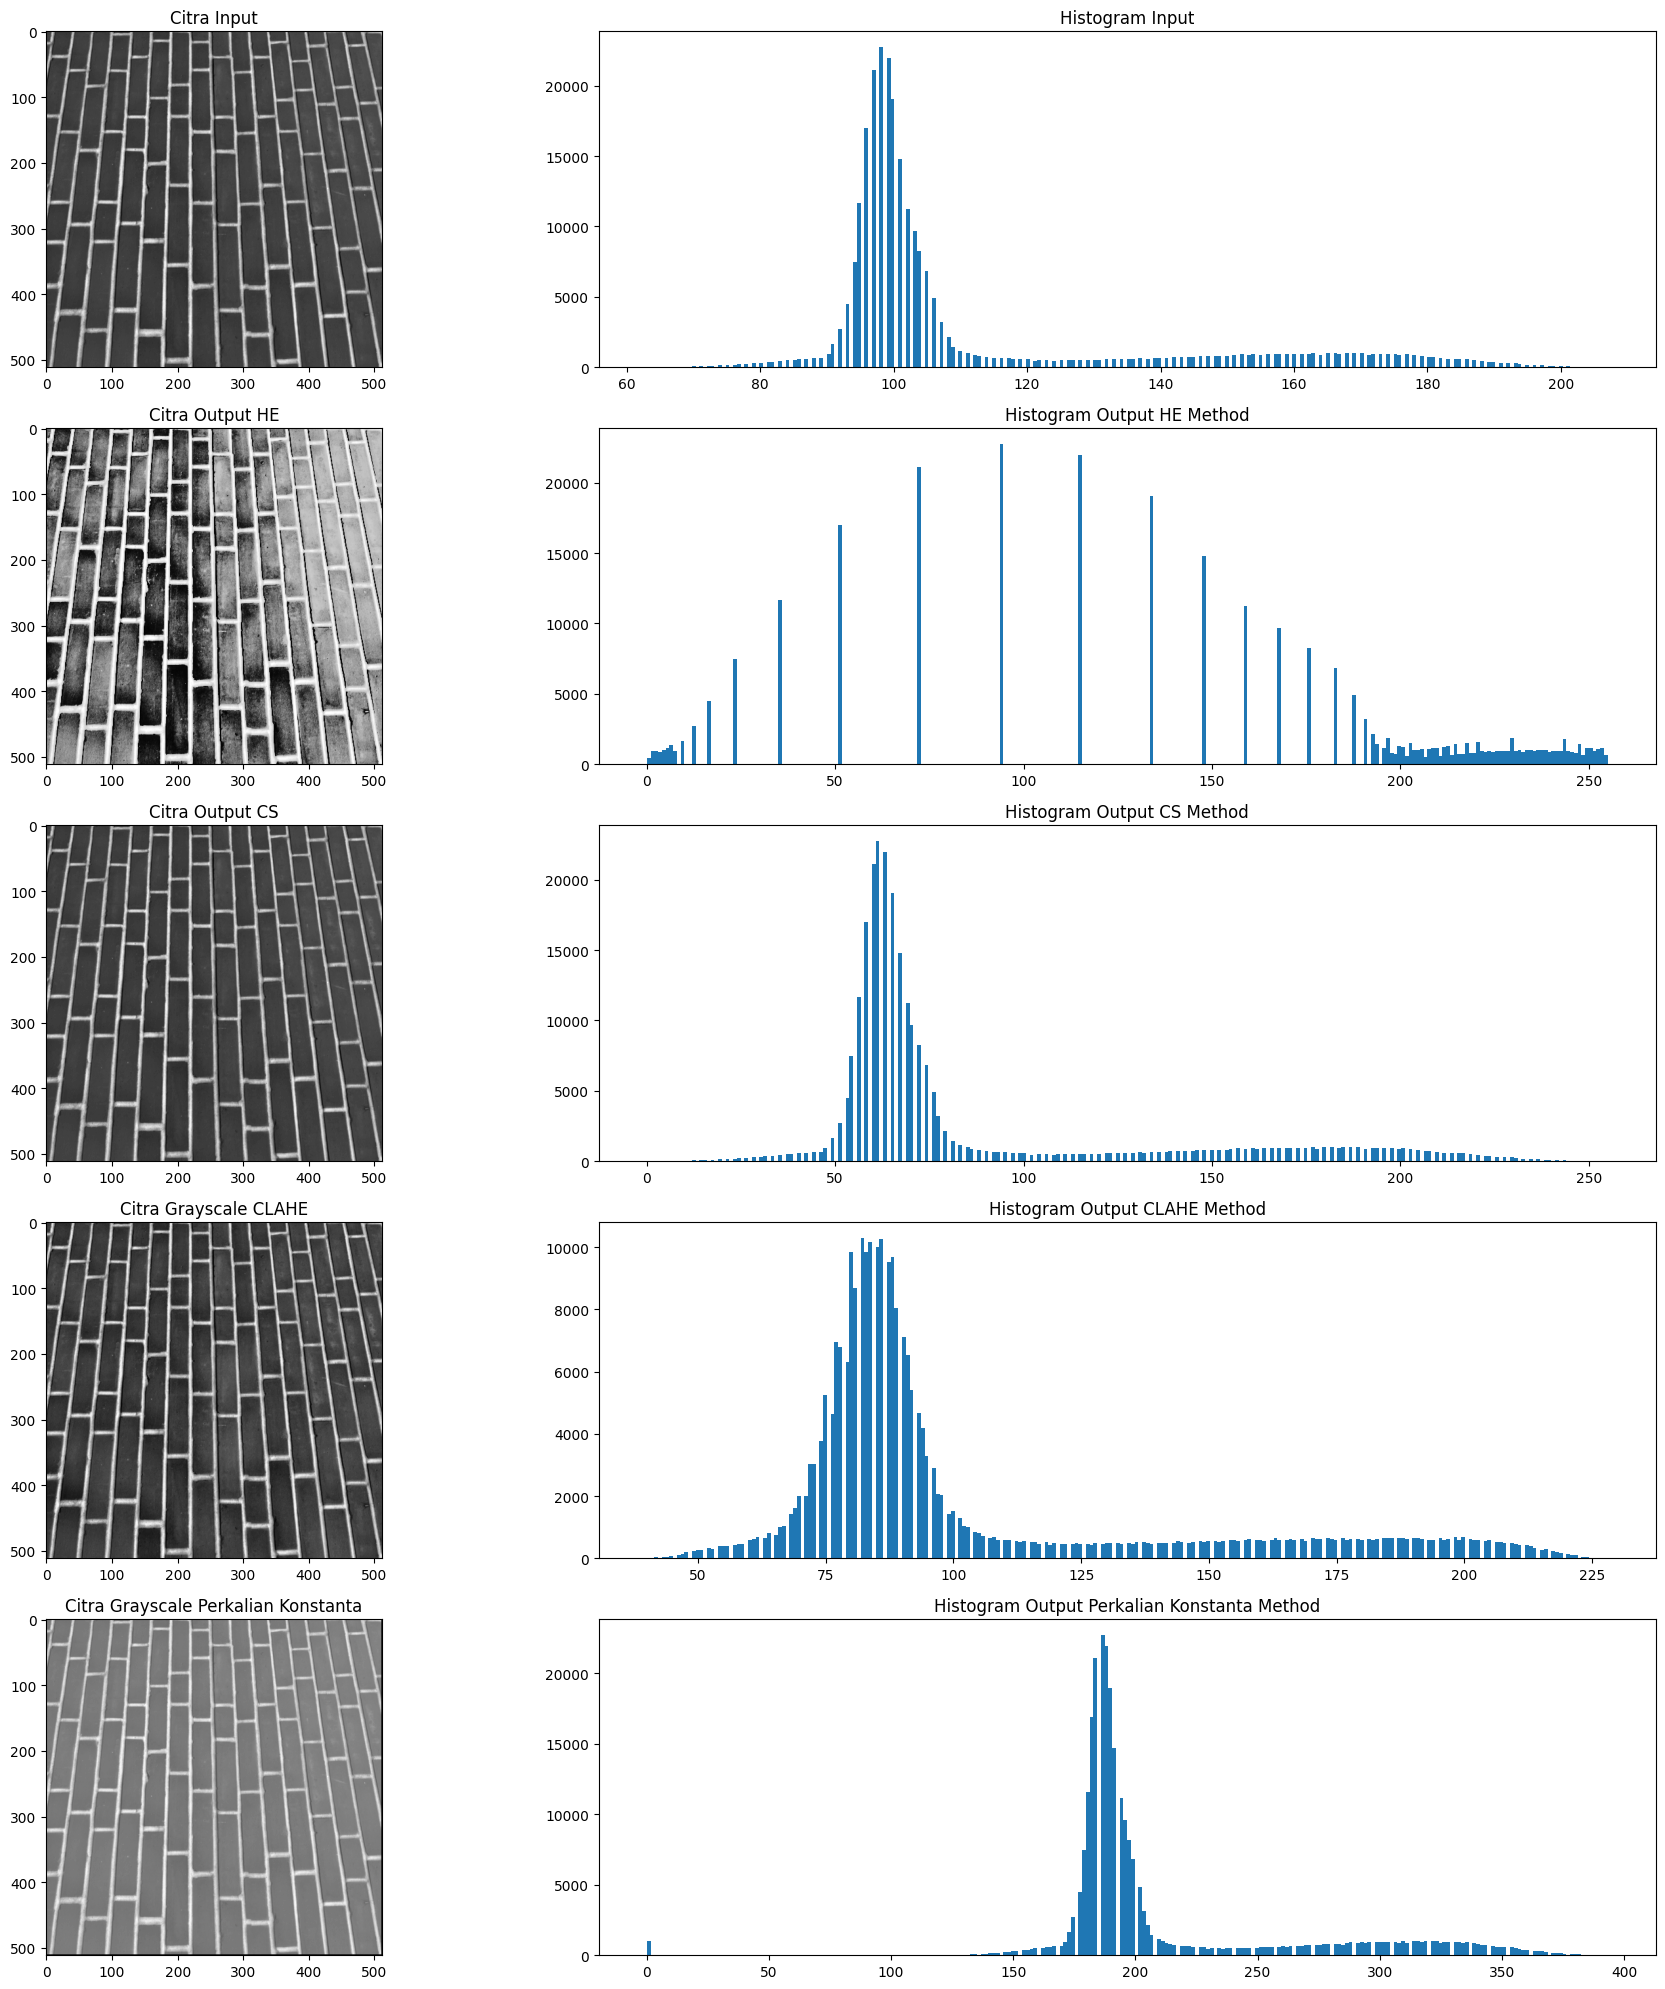

In [29]:
# Membuat subplot untuk menampilkan citra dan histogram hasil pengolahan
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()
# Menampilkan citra input
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")

# Menampilkan histogram citra input
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

# Menampilkan citra hasil equalisasi histogram
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")

# Menampilkan histogram citra hasil equalisasi histogram
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

# Menampilkan citra hasil kontras Min-Max
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")

# Menampilkan histogram citra hasil equalisasi histogram
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# Menampilkan citra hasil CLAHE
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")

# Menampilkan histogram citra hasil CLAHE
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# Menampilkan citra hasil perkalian konstanta
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")

# Menampilkan histogram citra hasil perkalian konstanta
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout()